# App (Linkedin)  Reviews Sentiment Analysis using Python

App Reviews Sentiment Analysis means evaluating and understanding the sentiments expressed in user reviews of mobile applications (apps). It involves using data analysis techniques to determine whether the sentiments in these reviews are positive, negative, or neutral. If you want to learn how to analyze the sentiments of the reviews of any app, this article is for you. In this article, I’ll take you through the task of App Reviews Sentiment Analysis using Python.



## App Reviews Sentiment Analysis: Process We Can Follow
App Reviews Sentiment Analysis is a valuable tool for app developers and businesses to understand user feedback, prioritize feature updates, and maintain a positive user community.

Below is the process we can follow for the task of app reviews sentiment analysis:

1. The first step is to gather a dataset of app reviews.
2. Then, perform EDA by analyzing the length of the reviews and their ratings, etc.
3. Then, label the sentiment data using tools like Textblob or NLTK.
4. Understand the overall distribution of sentiments (positive, negative, neutral) in the dataset.
5. Explore the relationship between the sentiments and the ratings given.
6. Analyze the text of the reviews to identify common themes or words in different sentiment categories.

So, the process starts with collecting an app reviews dataset. I found an ideal dataset for this task. 

### App Reviews Sentiment Analysis using Python
Now, let’s get started with the task of app reviews sentiment analysis by importing the necessary Python libraries and the dataset:

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
linkedin_data = pd.read_csv(r"C:\Users\shali\Downloads\linkedin-reviews.csv")

# Display the first few rows of the dataset
print(linkedin_data.head())

                                              Review  Rating
0  Does absolutely nothing for a LinkedIn beginne...       1
1                            Force close(galaxy tab)       1
2  Slow and it tries to upload your contacts with...       1
3  Add ability to customize the profile and move ...       4
4  Good app, but it's a pain that it's not possib...       4


The dataset contains two columns: Review and Rating. The Review column consists of textual reviews, and the Rating column contains corresponding numerical ratings.

Let’s have a look at the column information:

In [6]:
print(linkedin_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB
None


Exploratory Data Analysis
Now, let’s explore this data step by step. We’ll start by analyzing the distribution of ratings. It will provide insight into the overall sentiment of the reviews. Then, we can explore further, such as analyzing the length of reviews, and possibly derive insights from the text of the reviews.

Let’s begin with the distribution of ratings:

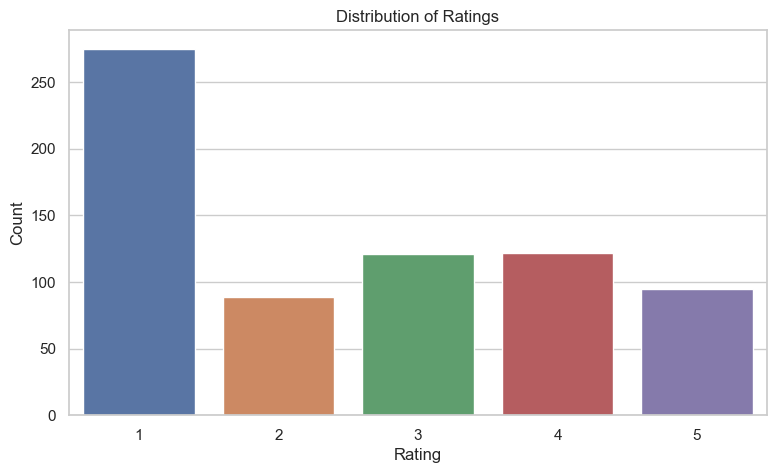

In [7]:
# Plotting the distribution of ratings
sns.set(style="whitegrid")
plt.figure(figsize=(9, 5))
sns.countplot(data=linkedin_data, x='Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Here’s the distribution of ratings from the LinkedIn reviews dataset. As you can see, it gives a clear picture of how many reviews fall into each rating category (from 1 to 5).

Next, we’ll analyze the length of the reviews, as this can sometimes correlate with the sentiment or detail of feedback. We will first calculate the length of each review and then visualize the data:



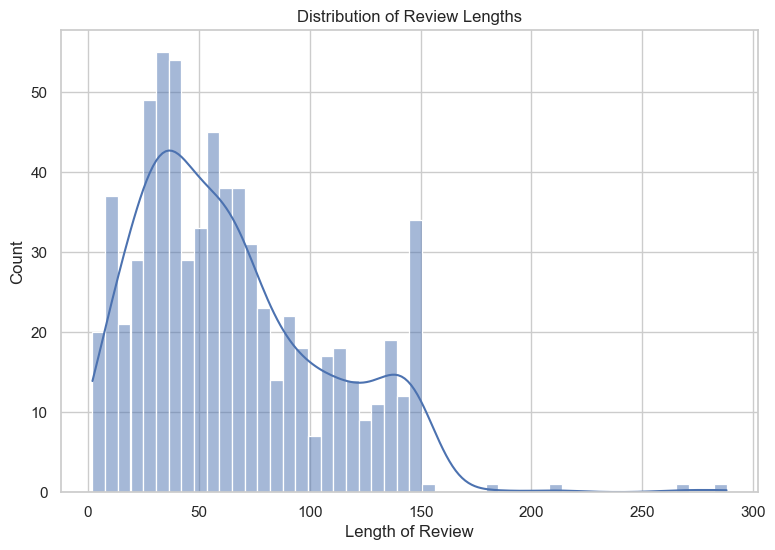

In [8]:
# Calculating the length of each review
linkedin_data['Review Length'] = linkedin_data['Review'].apply(len)

# Plotting the distribution of review lengths
plt.figure(figsize=(9, 6))
sns.histplot(linkedin_data['Review Length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.show()

### Adding Sentiment Labels in the Data
Now, the next step is to label the data with sentiments. We can use Textblob for this task. TextBlob provides a polarity score ranging from -1 (very negative) to 1 (very positive) for a given text. We can use this score to classify each review’s sentiment as positive, neutral, or negative. You can install it by executing the pip command mentioned below in your terminal or command prompt:
   -  pip install textblob
   
Let’s proceed to label the dataset using TextBlob for sentiment analysis:

In [9]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable


In [10]:
from textblob import TextBlob

def textblob_sentiment_analysis(review):
    # Analyzing the sentiment of the review
    sentiment = TextBlob(review).sentiment
    # Classifying based on polarity
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Applying TextBlob sentiment analysis to the reviews
linkedin_data['Sentiment'] = linkedin_data['Review'].apply(textblob_sentiment_analysis)

# Displaying the first few rows with the sentiment
print(linkedin_data.head())

                                              Review  Rating  Review Length  \
0  Does absolutely nothing for a LinkedIn beginne...       1             80   
1                            Force close(galaxy tab)       1             23   
2  Slow and it tries to upload your contacts with...       1             61   
3  Add ability to customize the profile and move ...       4             90   
4  Good app, but it's a pain that it's not possib...       4            133   

  Sentiment  
0  Negative  
1   Neutral  
2  Negative  
3   Neutral  
4  Positive  


The dataset now includes sentiment labels for each review, classified as Positive, Negative, or Neutral based on the polarity score calculated by TextBlob.

### Analyzing App Reviews Sentiments
Now that our dataset is labelled, let’s perform app reviews sentiment analysis. We’ll begin by analyzing the distribution of sentiments across the dataset. It will give us a basic understanding of the general sentiment tendency in the reviews:

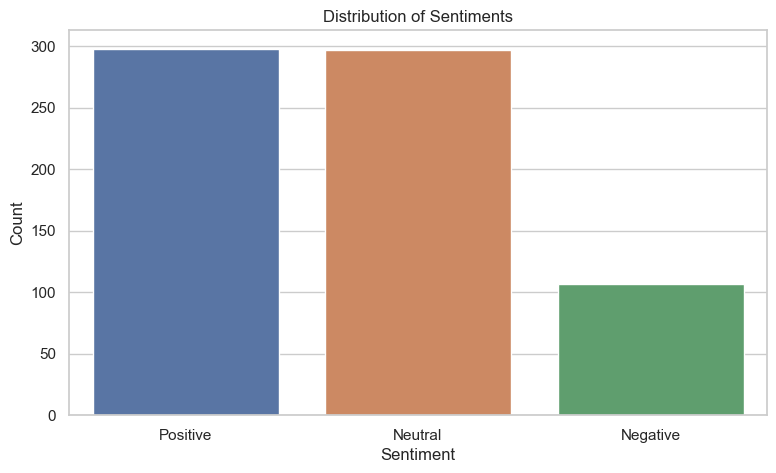

In [11]:
# Analyzing the distribution of sentiments
sentiment_distribution = linkedin_data['Sentiment'].value_counts()

# Plotting the distribution of sentiments
plt.figure(figsize=(9, 5))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

So, we can see although the app has low ratings, still the reviewers don’t use many negative words in the reviews for the app.

Next, we’ll explore the relationship between the sentiments and the ratings. This analysis can help us understand whether there is a correlation between the sentiment of the text and the numerical rating. For this task, we can see how sentiments are distributed across different rating levels:

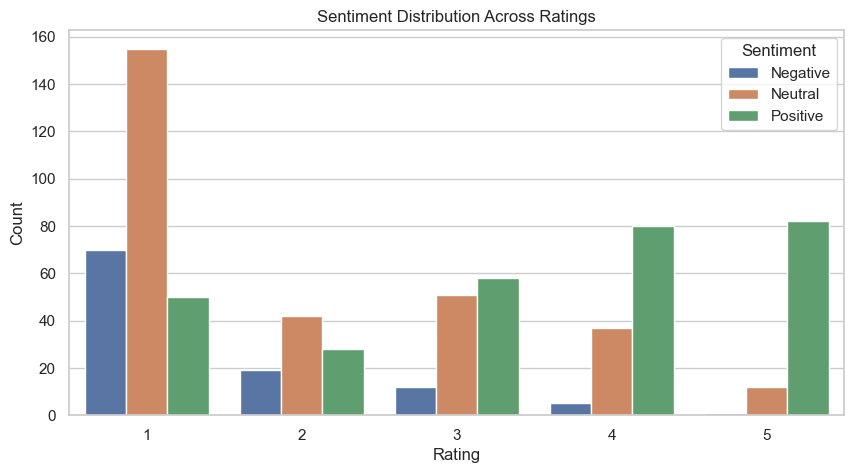

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(data=linkedin_data, x='Rating', hue='Sentiment')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

Now, let’s perform a text analysis to identify common words or themes within each sentiment category. It involves examining the most frequently occurring words in positive, negative, and neutral reviews using a word cloud:

In [14]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 300.6/300.6 kB 808.8 kB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


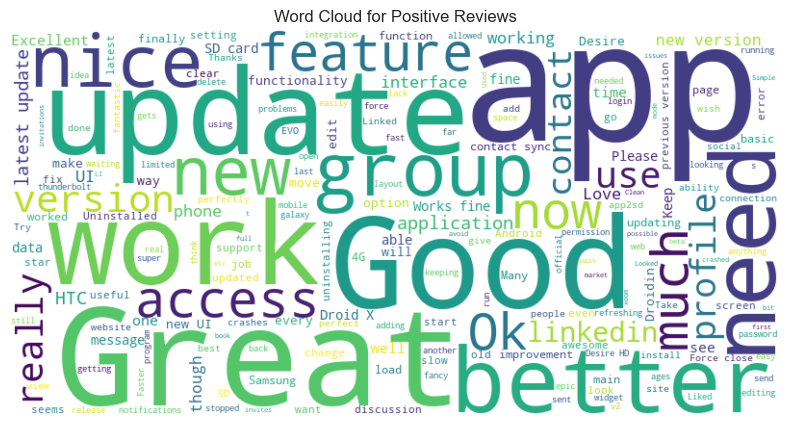

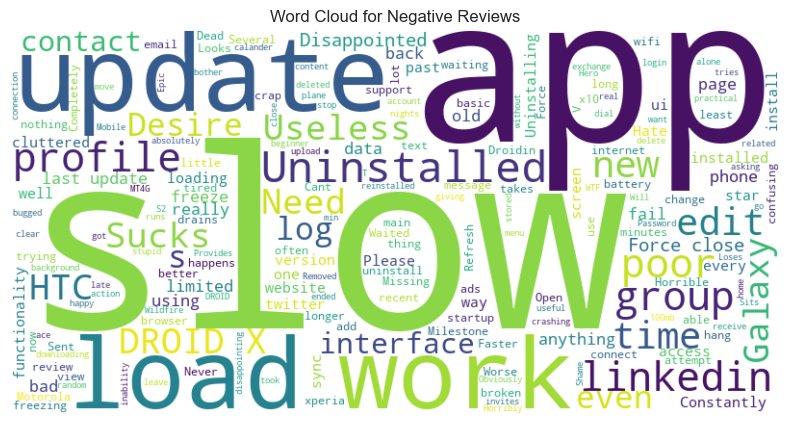

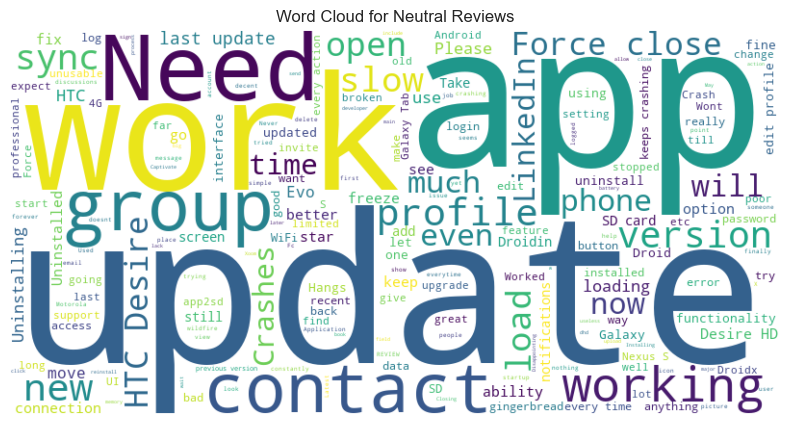

In [15]:
from wordcloud import WordCloud

# Function to generate word cloud for each sentiment
def generate_word_cloud(sentiment):
    text = ' '.join(review for review in linkedin_data[linkedin_data['Sentiment'] == sentiment]['Review'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()

# Generating word clouds for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment)

So, this is how you can perform Reviews Sentiment Analysis using Python.

## Summary
So, App Reviews Sentiment Analysis is a valuable tool for app developers and businesses to understand user feedback, prioritize feature updates, and maintain a positive user community. It involves using data analysis techniques to determine whether the sentiments in these reviews are positive, negative, or neutral. I hope you liked this article on App Reviews Sentiment Analysis using Python.